In [89]:
import nltk
#import advertools as adv
import json
import collections
import re
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [74]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\svr\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [90]:
data = []
with open(".\\english10k_tweets.json",encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

In [91]:
df=pd.DataFrame(columns=['tweet_id','tweet_text'])

In [81]:
print(df)

Empty DataFrame
Columns: [tweet_id, tweet_text]
Index: []


In [92]:
for line in data:
    if "extended_tweet" in line:
        df = df.append({'tweet_id': line['id'],
            'tweet_text':line["extended_tweet"]['full_text']         
                       }, ignore_index=True)        
    else:
        df = df.append({'tweet_id': line['id'],
            'tweet_text':line['text']           
                       }, ignore_index=True)

In [93]:
df.set_index('tweet_id',inplace=True)

In [ ]:
# We'll use read_csv and make note of the sep argument, we can also specify the desired column names by passing in a list of names

In [95]:
df_lable = pd.read_csv("en10k_markup.txt",sep=' ',index_col=1,names=["lable"])

In [96]:
df_lable.describe()


,lable
count,9998.000000
mean,0.225145
std,0.417699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [86]:
df_final = pd.merge(df,df_lable, how='left',left_index=True,right_index=True)
df_final.fillna(0,inplace=True)

In [87]:
df_final.head()


,tweet_text,lable
tweet_id,,
815331870015627265,"Wind 1,4 m/s ENE. Barometer 1003,2 hPa, Fallin...",1.0
815332374909222912,@pasdcheval i did it,0.0
815332387496357889,Happy New Year 2017! https://t.co/UFob5hzO5o,0.0
815332527254732800,Happy new Year from sweden,0.0
815332597886840834,Happy New Years!!!! 💫,0.0


Exploratory data analysis of some data visulization and statistical 

## Exploratory Data Analysis

In [106]:
df_final.describe() # to describe what's going on 

,lable
count,10000.000000
mean,0.225100
std,0.417669
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [108]:
df_final.groupby('lable').describe()

tweet_text                                                            \
           count unique                                                top   
lable                                                                        
0.0         7749   7748                                      Anyone awake?   
1.0         2251   2241  We're #hiring! Read about our latest #job open...   

            
      freq  
lable       
0.0      2  
1.0      3

In [112]:
df_final['length'] = df_final['tweet_text'].apply(len)
df_final.head()

,tweet_text,lable,length
tweet_id,,,
815331870015627265,"Wind 1,4 m/s ENE. Barometer 1003,2 hPa, Fallin...",1.0,100
815332374909222912,@pasdcheval i did it,0.0,20
815332387496357889,Happy New Year 2017! https://t.co/UFob5hzO5o,0.0,44
815332527254732800,Happy new Year from sweden,0.0,26
815332597886840834,Happy New Years!!!! 💫,0.0,21


## Save dataframe in Excel sheet 

In [254]:
# DF TO EXCEL

writer = ExcelWriter('PythonLastSaeideh.xlsx')
df_final.to_excel(writer,'Sheet5')
writer.save()

## Data Visualization 

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

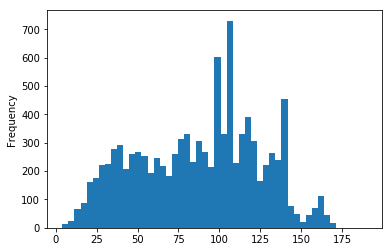

In [114]:
df_final['length'].plot(bins=50, kind='hist') 
# here we can see the distribution of the tweet text length

In [115]:
df_final['length'].describe() # longest text tweet is 190 

count    10000.000000
mean        87.228300
std         37.315531
min          4.000000
25%         56.000000
50%         92.000000
75%        115.000000
max        190.000000
Name: length, dtype: float64

In [117]:
df_final[df_final['length'] == 190]['tweet_text'].iloc[0] # Masking to see which row have longest text tweet
# by writing .iloc[0] we can have entire text tweet

'@Spring__Dew @SandyAvila37 Hey 👋I have been a BEASTIES since 2013 When I saw the first "Beauty and the Beast"in DanishTV 📺and never seen anything like #BATB #SaveBatB https://t.co/szGrnlop0N'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2F3F89588>,
      dtype=object)

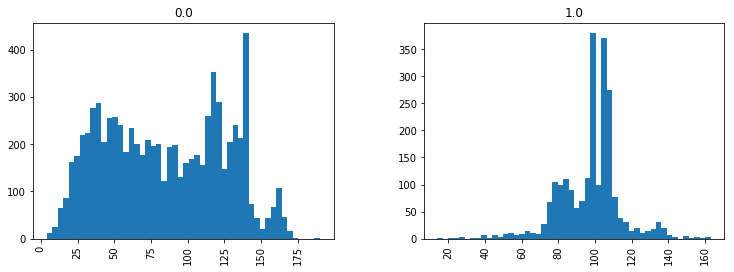

In [118]:
# make histogrm of tweet-text (0=HGT, 1=AGT)
# by basic data visulization we discover that HGT tweet text tend to have more character
df_final.hist(column='length', by='lable', bins=50,figsize=(12,4))
# Conclusion: tweet-text which are HGT tend to be longer than text-tweet that are AGT.

In [105]:
from nltk.corpus import stopwords
stopwords.words('english')[0:20] # Show some stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

# Porter stemmer


In [75]:
#stemmer = PorterStemmer(mode="MARTIN_EXTENSIONS")

In [77]:
#stemmer.stem('swimming')

# Snowball stemmer

In [119]:
stemmer = SnowballStemmer("english")

In [13]:
#stemmer.stem('swimming')

'swim'

In [217]:
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', 'xurlx', tweet)  
    tweet = re.sub('\d[\d,]*\d|\d+', 'xnumberx', tweet)  
    tweet = re.sub('#\S+', 'xhashtagx', tweet) 
    tweet = re.sub('@\S+', 'xuserx', tweet) 
    tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', tweet)
    tweet = re.sub('\s+', ' ', tweet)  
#     tweet = re.sub('\s+', tweet.lower(), tweet)
    return map(lambda x:stemmer.stem(x),tweet.split())

In [252]:
df['tweet_text'].head(100).apply(clean_tweet).apply(list)

tweet_id
815331870015627265    [wind, xnumberx, m, s, ene, baromet, xnumberx,...
815332374909222912                                 [xuserx, i, did, it]
815332387496357889                  [happi, new, year, xnumberx, xurlx]
815332527254732800                     [happi, new, year, from, sweden]
815332597886840834                                [happi, new, year, 💫]
815333076070965249     [xuserx, xuserx, he, is, a, hunk, papi, nowaday]
815333369751990276                           [xuserx, happi, new, year]
815333438374998016    [xuserx, happi, new, year, and, happi, xnumber...
815333549289209856    [not, onli, have, the, firework, been, go, off...
815333756932333569    [i, know, it, probabl, didn, t, come, out, in,...
815333875077566465              [when, you, p, r, o, g, r, a, m, xurlx]
815333969801728001                     [happi, new, year, bitch, xurlx]
815334054790893568                 [xuserx, same, to, you, amp, famili]
815334109656522753    [guess, who, been, on, stage, xus

In [ ]:
# we create Bag of Words transformer and to see how many time one specific word counts show up
# we can also use .transform method on our BOW or transformed object and transfer the entire data frame of tweet text 

In [219]:
# Might take awhile...
# the object we created
bow_transformer = CountVectorizer(analyzer=clean_tweet).fit(df['tweet_text'])
#bow_transformer = CountVectorizer(analyzer=clean_tweet).fit(df['tweet_text'].apply(clean_tweet).apply(list))

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11021


In [ ]:
#we can take one sample tweet text and get BOW counts as a vector putting 

In [220]:
message4 = df.loc[815331870015627265,'tweet_text']
print(message4)
# print(df.loc[[0]])

Wind 1,4 m/s ENE. Barometer 1003,2 hPa, Falling. Temperature 7,6 °C. Rain today 0,0 mm. Humidity 99%


In [221]:
#Now let's see its vector representation:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 725)	1
  (0, 2630)	1
  (0, 2852)	1
  (0, 4045)	1
  (0, 4068)	1
  (0, 5194)	1
  (0, 5565)	1
  (0, 6887)	1
  (0, 7316)	1
  (0, 8569)	1
  (0, 8780)	1
  (0, 9577)	1
  (0, 9718)	5
  (0, 10015)	1
(1, 11021)


In [222]:
print(bow_transformer.get_feature_names()[9718])
print(bow_transformer.get_feature_names()[10015])

xnumberx
°c


# Training a model

In [ ]:
#let's go and see how the bag of words counts for the entire SMS courpose in a large sparse Matrix

In [153]:
messages_bow = bow_transformer.transform(df['tweet_text'])

In [154]:
print('Shape of Sparse Matrix: ', messages_bow.shape) #10000 row and 11021 columns
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (10000, 11021)
Amount of Non-Zero occurences:  115618


In [223]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.1049069957354142


In [206]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_bow, df['tweet_text'])

In [228]:
print('predicted:', spam_detect_model.predict(bow4)[0])
#print('expected:', df['tweet_text'].df['lable'][3])

predicted: Wind 0,0 m/s ENE. Barometer 1003,9 hPa, Falling. Temperature -1,6 °C. Rain today 0,0 mm. Humidity 86%


# TF-IDF

In [229]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 10015)	0.1851684422417155
  (0, 9718)	0.7068801757366929
  (0, 9577)	0.18163906347855768
  (0, 8780)	0.17546546844461092
  (0, 8569)	0.18375098260352138
  (0, 7316)	0.15573398314335613
  (0, 6887)	0.18355126951106362
  (0, 5565)	0.1856314634878939
  (0, 5194)	0.16960745882552855
  (0, 4068)	0.18271003103682512
  (0, 4045)	0.18625459496884117
  (0, 2852)	0.22209535719935655
  (0, 2630)	0.3092110471050415
  (0, 725)	0.18521970802834364


In [230]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['xnumberx']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['wind']])

2.42222880912944
3.1120647283857292


In [231]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(10000, 11021)


In [232]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['Wind 0,0 m/s ENE. Barometer 1003,9 hPa, Falling. Temperature -1,6 °C. Rain today 0,0 mm. Humidity 86%'
 "@vagabondartist @JOutred @IndianaJedi I didn't want to love it. I just did. ;)"
 '"Happy New Year" HAPPY NEW YEAR! 2017 is gonna be a good year indeed!! Let me wish every body a litter bit of happiness!❤️💙🇸🇴🙋\u200d♂️'
 ...
 'I\'ve been playing Daily Coins in  "Coins &amp; Coupons" . Come and join me and win up to US $12 in coupons on the app.\n https://t.co/Xsa5SyAHs0'
 'Simple lunch! Roast beef steak minute with ratatouille and a classy, perfectly drinkable, pure,… https://t.co/tt0lxE4MoJ'
 'BUT SHE LOVES LEXA\nBUT SHE LOVES LEXA \nBUT SHE LOVES LEXA  AND ALWAYS WILL https://t.co/Kb61OlXSRX']


# Training a model TFIDF

In [244]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['tweet_text'])
print('predicted:', spam_detect_model.predict(tfidf4))

predicted: ['I\'ve been playing Daily Coins in  "Coins &amp; Coupons" . Come and join me and win up to US $12 in coupons on the app.\n https://t.co/Xsa5SyAHs0']


In [243]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df['tweet_text'].loc[815331870015627265])

predicted: I've been playing Daily Coins in  "Coins &amp; Coupons" . Come and join me and win up to US $12 in coupons on the app.
 https://t.co/Xsa5SyAHs0
expected: Wind 1,4 m/s ENE. Barometer 1003,2 hPa, Falling. Temperature 7,6 °C. Rain today 0,0 mm. Humidity 99%


In [124]:
import string

In [125]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # replace number by xnumberx
    return [word for word in nopunc.split() if word.start not in stopwords.words('english')]


In [127]:
# Check to make sure its working
df['tweet_text'].head(10).apply(text_process)

tweet_id
815331870015627265    [Wind, 14, ms, ENE, Barometer, 10032, hPa, Fal...
815332374909222912                                         [pasdcheval]
815332387496357889         [Happy, New, Year, 2017, httpstcoUFob5hzO5o]
815332527254732800                           [Happy, new, Year, sweden]
815332597886840834                               [Happy, New, Years, 💫]
815333076070965249      [nelson02051, Arianna483, hunk, papi, nowadays]
815333369751990276                      [ThatManMatt, Happy, new, year]
815333438374998016    [sarahchang, Happy, New, Year, happy, 300, yea...
815333549289209856    [fireworks, going, since, 9pm, going, 360, aro...
815333756932333569    [know, probably, didnt, come, January, dont, k...
Name: tweet_text, dtype: object

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['tweet_text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

29846


In [255]:
# DF TO EXCEL

writer = ExcelWriter('PythonWithClean.xlsx')
df['tweet_text'].head(10000).apply(clean_tweet).apply(list).to_excel(writer,'Sheet1')
writer.save()

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, make_scorer

In [193]:
X = df_final['tweet_text']
y = df_final['lable']

In [194]:
X.shape

(10000,)

# Naive Bayes classifier (NB)

In [ ]:
# Pipeline can be used to chain multiple estimators into one.
#This is useful as there is often a fixed sequence of steps in processing the data, 
#for example feature selection, normalization and classification. Pipeline serves multiple purposes.

In [195]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_tweet)),  
    ('classifier', MultinomialNB()),  
])

In [170]:
recall = cross_val_score(pipeline, X, y, cv=10,scoring='recall')
print(recall.mean())

0.9044896755162242


In [171]:
precision = cross_val_score(pipeline, X, y, cv=10,scoring='precision')
print(precision.mean())

0.9746900234634277


In [196]:
f1_score = cross_val_score(pipeline, X, y, cv=KFold(n_splits=10, shuffle=False,random_state=3), scoring=make_scorer(f1_score))
print(f1_score)

[0.92682927 0.95535714 0.94061758 0.91970803 0.8956743  0.93658537
 0.95296524 0.93995859 0.95010846 0.9580574 ]


In [197]:
# Confusion matrix is not a score, it is a kind of summary of what happened during evaluation.

y_pred = cross_val_predict(pipeline, X , y, cv=KFold(n_splits=10, shuffle=False,random_state=3))
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

#[row, column]
TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

[[7698   51]
 [ 215 2036]]


# Support Vector Machine(SVM)


In [224]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_tweet)),  
    ('classifier', SVC(gamma='scale')),  
])

In [225]:
recall = cross_val_score(pipeline, X, y, cv=10,scoring='recall')
print(recall.mean())

0.8876086529006884


In [226]:
precision = cross_val_score(pipeline, X, y, cv=10,scoring='precision')
print(precision.mean())

0.9974923857868021


In [227]:
f1_score = cross_val_score(pipeline, X, y, cv=KFold(n_splits=10, shuffle=False,random_state=3), scoring=make_scorer(f1_score))
print(f1_score)

AttributeError: 'numpy.ndarray' object has no attribute '__name__'

# Random Forest(RF)

In [21]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_tweet)),  
    ('classifier', RandomForestClassifier(n_estimators=600)),  
])

In [22]:
recall = cross_val_score(pipeline, X, y, cv=10,scoring='recall')
print(recall.mean())

0.9662340216322518


In [23]:
precision = cross_val_score(pipeline, X, y, cv=10,scoring='precision')
print(precision.mean())

0.9986188136188137
